----
# **Python API Homework - WeatherPy**
### Submitted by : Sheetal Bongale | UT Data Analysis and Visualization
##### *This Jupyter notebook has a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator using CityPy, a simple Python library, and the OpenWeatherMap API.*
---

<b> Note: </b> Please find the written analysis of this data at the bottom of this jupyter notebook.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import seaborn as sns

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_Data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Define a function to perform API Calls
def get_weather(city, api_key):
    url = "http://api.openweathermap.org/data/2.5/weather"
    r = requests.get(url, params={"appid": api_key,"q": city, "units":"imperial"})
    if r.status_code == 200:        
        response = r.json()
        return response
    else:
        print("City not found. Skipping...")
        return None  

In [4]:
# Successive API calls and print log for each city
city_data = []
record_count = 1
set_count = 1

print("Beginning Data Retrieval\n------------------------")

# Loop through the cities
for i,city in enumerate(cities):
    # Condition to limit 50 records per set
    if (i%50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Print log for each city along with the set and record count   
    print("Processing Record %s of Set %s | %s" %(record_count, set_count, city))
    record_count += 1
    
    # Function call to get the data, parse and append for random cities
    city_results = get_weather(city, api_key)
    if city_results:
        city_data.append(city_results)
    
print("------------------------\nData Retrieval Complete\n------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | lavrentiya
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | krapivinskiy
Processing Record 9 of Set 1 | nizhniy kuranakh
Processing Record 10 of Set 1 | sorland
Processing Record 11 of Set 1 | ampanihy
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | nantucket
Processing Record 14 of Set 1 | faya
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | praia da vitoria
Processing Record 17 of Set 1 | tefe
Processing Record 18 of Set 1 | bima
Processing Record 19 of Set 1 | tuatapere
Processing Record 20 of Set 1 | concordia
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | hermanus
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert city data to dataframe and clean up
df=pd.DataFrame([{
    "City": data["name"],
    "Country": data["sys"]["country"],
    "Date": date.fromtimestamp(data['dt']).isoformat(),
    "Cloudiness": data["clouds"]["all"],
    "Humidity": data["main"]["humidity"],
    "Lat": data["coord"]["lat"],
    "Lng": data["coord"]["lon"],
    "Max Temp": data["main"]["temp_max"],
    "Wind Speed": data["wind"]["speed"]
} for data in city_data])

df.sort_values(by="Max Temp", ascending=False).head()

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
299,Port Macquarie,AU,2020-01-07,3,54,-31.43,152.91,96.01,8.05
232,Mount Isa,AU,2020-01-07,95,43,-20.73,139.49,91.40,8.05
120,Honiara,SB,2020-01-07,40,66,-9.43,159.96,89.60,10.29
331,Port Augusta,AU,2020-01-07,0,53,-32.49,137.76,88.00,9.17
272,Tautira,PF,2020-01-07,40,66,-17.73,-149.15,87.80,6.93


In [6]:
# Export the city data into a .csv file
df.to_csv(output_data_file)
df.count()

City          573
Country       573
Date          573
Cloudiness    573
Humidity      573
Lat           573
Lng           573
Max Temp      573
Wind Speed    573
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

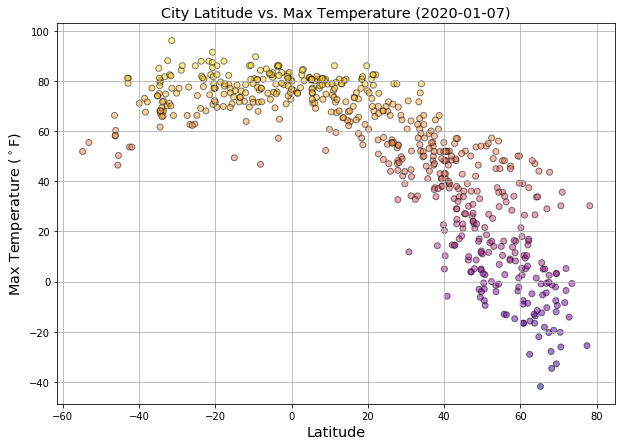

In [7]:
plt.rcParams["figure.figsize"] = (10,7)
c = df["Max Temp"]
plt.scatter(df["Lat"], df["Max Temp"], edgecolors="black", alpha = 0.5, marker = "o", c=c, cmap="plasma")
plt.xlabel("Latitude", fontsize="x-large")
plt.ylabel("Max Temperature ($^\circ$F)", fontsize="x-large")
plt.title("City Latitude vs. Max Temperature ({})".format(df["Date"][0]), fontsize="x-large")
plt.grid()
plt.savefig("Output_Plots/lat_vs_maxtemp.png")
plt.show()

#### Latitude vs. Humidity Plot

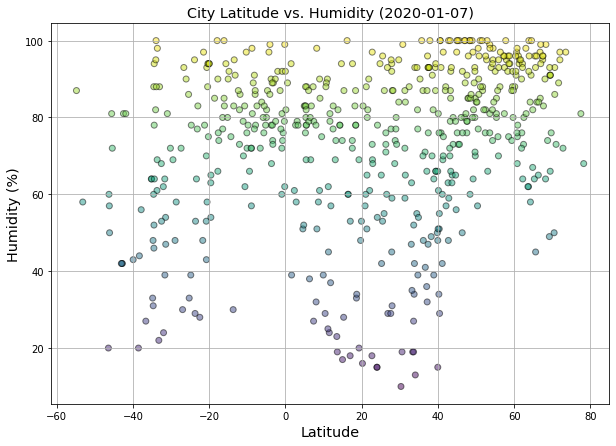

In [8]:
plt.rcParams["figure.figsize"] = (10,7)
c = df["Humidity"]
plt.scatter(df["Lat"], df["Humidity"], edgecolors="black", alpha = 0.5, marker = "o", c=c, cmap = "viridis")
plt.xlabel("Latitude", fontsize="x-large")
plt.ylabel("Humidity (%)", fontsize="x-large")
plt.title("City Latitude vs. Humidity ({})".format(df["Date"][0]), fontsize="x-large")
plt.grid()
plt.savefig("Output_Plots/lat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

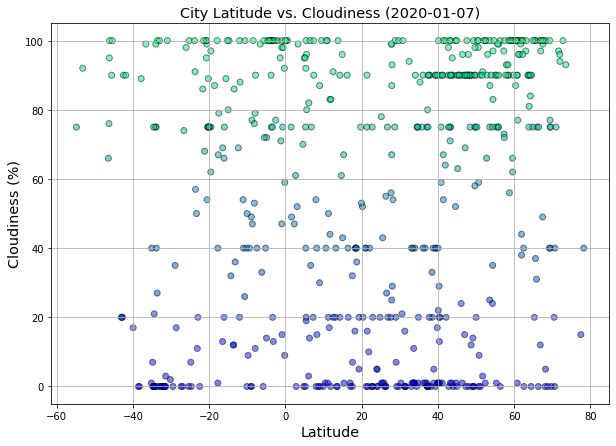

In [9]:
plt.rcParams["figure.figsize"] = (10,7)
c = df["Cloudiness"]
plt.scatter(df["Lat"], df["Cloudiness"], edgecolors="black", alpha = 0.5, marker = "o", c=c, cmap="winter")
plt.xlabel("Latitude", fontsize="x-large")
plt.ylabel("Cloudiness (%)", fontsize="x-large")
plt.title("City Latitude vs. Cloudiness ({})".format(df["Date"][0]), fontsize="x-large")
plt.grid()
plt.savefig("Output_Plots/lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

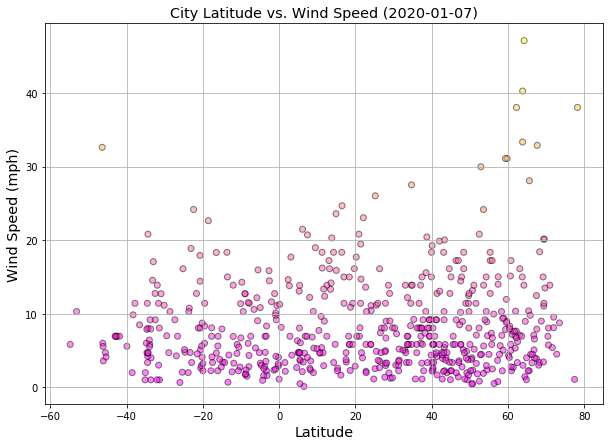

In [10]:
plt.rcParams["figure.figsize"] = (10,7)
c = df["Wind Speed"]
plt.scatter(df["Lat"], df["Wind Speed"], edgecolors='black', alpha = 0.5, marker = "o",c=c, cmap="spring")
plt.xlabel("Latitude", fontsize="x-large")
plt.ylabel("Wind Speed (mph)", fontsize="x-large")
plt.title("City Latitude vs. Wind Speed ({})".format(df["Date"][0]), fontsize="x-large")
plt.grid()
plt.savefig("Output_Plots/lat_vs_windspeed.png")
plt.show()

## WeatherPy Data Analysis Report
Following were the trends observed after the analysis:

- **Temperature:** As expected, temperature increases as one approaches the equator. However, temperature peaks at and between -33.86 and -20 degrees latitude with the hottest temperatures recorded. The graph clearly shows that the southern hemisphere is having hotter temperatures indicating the current summer season. Most of the random generated top cities with max temperatures are in Australia and African continent.

- **Humidity:** • There is no strong relationship between latitude and humidity. However, there is a larger cluster of cities in the northern hemisphere with high humidity (above 80% humidity).

- **Cloudiness:** Cloudiness does not show a strong correlation to latitude. Most cities lie in the band of ranges 0, 90 and 100% cloudiness.

- **Wind Speed:** Also, There is no strong relationship between latitude and wind speeds. However, the plots shows that there are a few cities in northern hemisphere having higher wind speeds (more than 30mph).